In [2]:
import subprocess
import numpy as np
import healpy as hp
import pickle
from random import randint
import joblib
import sklearn
import sys
import importlib

sys.path.append('../methods_code_Nresol/')
sys.path.append('../utils/')
from utils_circpatch import *
from methods2 import *
from vis_utils import *
import astro_cuts
importlib.reload(astro_cuts)

<module 'astro_cuts' from '/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/notebooks_main1/../methods_code_Nresol/astro_cuts.py'>

In [2]:
testbedlist = [get_testbed_dict(name) for name in ['Perseus', 'Ursa Major', 'Polaris', 'Pegasus', 'Stripe-Splotch', 'NGC']]

In [3]:
coords = []
for regdict in testbedlist:
    coords.append(regdict['coords'])

In [4]:
coords = np.hstack(coords)
len(coords)

9872046

In [3]:
nbtestdir = '../notebooks_test/'

In [11]:
os.listdir(nbtestdir+'runs/2_12')

[]

In [12]:
runname = nbtestdir+'runs/2_12/15e_fwhm-6-1_6patches'
wisemodel = joblib.load('spectra_matched/models/svm_panstarrs_quasarsep_balanced.joblib')
smodel = joblib.load('spectra_matched/models/svm_sdss_quasarsep_unbalanced.joblib')

cuts_list = [('distmod_median_cut', {'mindm': 8}), ('e_nonneg_cut_sigfac', {'sigfac': 5.0}),
            ('bayestar_chisq_per_passband', {'maxchisq': 5.0}), 
            ('wise_svmnondetectioncombinedcut', {'model': wisemodel}), ('sdss_uvcut', {'model': smodel}),
            ('dm_sigma_cut', {'maxsig': 1.5})]

outer_kwargs = {'Nsidetile': 32, 'radius_deg_extra': 25/60, 'Nsideresol': 2048,
               'stars_presaved': '/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits'}
recon_kwargs = {'length': np.deg2rad(6.1/(2.355*60)), 'scale': 1.0, 'no_invvar': False}
kwargs_dict = {'outer_kwargs': outer_kwargs, 'recon_kwargs': recon_kwargs}
recon_func_name = 'gaussiankernel_reconstruction_effective_spherical3_blocks'

gnupartilewise_new(coords, recon_func_name, cuts_list, kwargs_dict, runname, sleep=3000, mem=4000, compile_pickle=True)

Using Star Directory: /n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits
Ckp


{'dustmap': array([0.05672136, 0.04392019, 0.03650989, ..., 0.        , 0.        ,
        0.        ]),
 'variancemap': array([0.0003509 , 0.0003201 , 0.00039393, ..., 0.        , 0.        ,
        0.        ]),
 'reconpix': array([   32067,    31563,    31562, ..., 41957561, 41957560, 41949374]),
 'func': 'gnupartilewise_new',
 'cuts_list': [('distmod_median_cut', {'mindm': 8}),
  ('e_nonneg_cut_sigfac', {'sigfac': 5.0}),
  ('bayestar_chisq_per_passband', {'maxchisq': 5.0}),
  ('wise_svmnondetectioncombinedcut', {'model': SVC(kernel='linear')}),
  ('sdss_uvcut', {'model': SVC()}),
  ('dm_sigma_cut', {'maxsig': 1.5})],
 'recon_func_name': 'gaussiankernel_reconstruction_effective_spherical3_blocks',
 'kwargs_dict': {'outer_kwargs': {'Nsidetile': 32,
   'radius_deg_extra': 0.4166666666666667,
   'Nsideresol': 2048,
   'stars_presaved': '/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits'},
  'recon_kwargs': {'length': 0.0007534683961192787,
   'scale': 1

In [38]:
importlib.reload(astro_cuts)
import methods2
importlib.reload(methods2)

<module 'methods2' from '/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/notebooks_main1/../methods_code_Nresol/methods2.py'>

In [4]:
regngc = get_testbed_dict('NGC')

In [ ]:
#15e but with a stricter sdss uv cut
runname = nbtestdir+'runs/2_12/15h_fwhm-6-1'
wisemodel = joblib.load('spectra_matched/models/svm_panstarrs_quasarsep_balanced.joblib')
smodel = joblib.load('spectra_matched/models/svm_sdss_quasarsep_unbalanced.joblib')

cuts_list = [('distmod_median_cut', {'mindm': 8}), ('e_nonneg_cut_sigfac', {'sigfac': 5.0}),
            ('bayestar_chisq_per_passband', {'maxchisq': 5.0}), 
            ('wise_svmnondetectioncombinedcut', {'model': wisemodel}), ('sdss_uvcut_strict', {'model': smodel}),
            ('dm_sigma_cut', {'maxsig': 1.5})]

outer_kwargs = {'Nsidetile': 32, 'radius_deg_extra': 25/60, 'Nsideresol': 2048,
               'stars_presaved': '/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits'}
recon_kwargs = {'length': np.deg2rad(6.1/(2.355*60)), 'scale': 1.0, 'no_invvar': False}
kwargs_dict = {'outer_kwargs': outer_kwargs, 'recon_kwargs': recon_kwargs}
recon_func_name = 'gaussiankernel_reconstruction_effective_spherical3_blocks'

recondict = gnupartilewise_new(regngc['coords'], recon_func_name, cuts_list, kwargs_dict, runname, sleep=1200, mem=4000, compile_pickle=True)

In [41]:
import do_recon_tilewise

In [42]:
_, _, _ = do_recon_tilewise.get_recon_for_tile(2150, outer_kwargs['Nsidetile'], outer_kwargs['radius_deg_extra'], getattr(methods_cluster, recon_func_name), 
                 recon_kwargs, cuts_list, outer_kwargs['Nsideresol'], savdirname=runname+'_tmpdir/', return_vec=True, presaved='/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits')

Region for tile2150


/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/notebooks_main1/../methods_code_Nresol/do_recon_tilewise.py:44: RuntimeWarning: divide by zero encountered in true_divide
  df['reduced_chisq'] = df['chisq'].to_numpy() * n_passbands / (n_passbands - 4)
/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/notebooks_main1/../methods_code_Nresol/do_recon_tilewise.py:49: RuntimeWarning: divide by zero encountered in power
  sdss_flux_sig = np.power(np.array(dat['sdss_dr14_starsweep.psfflux_ivar']), -0.5)
/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/notebooks_main1/../methods_code_Nresol/do_recon_tilewise.py:51: RuntimeWarning: divide by zero encountered in log10
  df['sdss.pmag_'+b] = 22.5 - 2.5*np.clip(np.log10(np.array(dat['sdss_dr14_starsweep.psfflux'])[:, ib]), 0.0, np.inf)
/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/notebooks_main1/../methods_code_Nresol/do_recon_tilewise.py:51: RuntimeWarning: invalid value encountered in log10
  df['sdss.pmag_'+b] = 22.5 - 2.5*np.clip(np.log

Cut0 47721 0.9559112215055486
Cut1 49480 0.9911461880533633
Cut2 49365 0.9888425944473378
Cut3 47719 0.9558711590080525
Cut4 49922 1.0
Cut5 48941 0.980349344978166
Cuts_All 44354 0.8884660069708745
Tile 2150, NumPixels=4096, NumStars=44354, Star/Pix ratio = 10.82861328125
SigRef 0.1991584324522759
No stars for pix 0.0
Stars Contributing >1sigma/N(pixel) of the weight matrix: Min stars = 5, 16%ile = 13.0, median stars = 18.0, 84%ile = 22.0, max stars = 35
No stars for pix 0.0
Stars Contributing >1sigma/N(pixel) of the weight matrix: Min stars = 0, 16%ile = 12.0, median stars = 16.0, 84%ile = 20.0, max stars = 30
No stars for pix 0.0
Stars Contributing >1sigma/N(pixel) of the weight matrix: Min stars = 7, 16%ile = 13.0, median stars = 16.0, 84%ile = 21.0, max stars = 30
No stars for pix 0.0
Stars Contributing >1sigma/N(pixel) of the weight matrix: Min stars = 5, 16%ile = 11.0, median stars = 15.0, 84%ile = 18.0, max stars = 30


In [46]:
tngc = np.unique(get_largepix_for_smallpix(regngc['coords'], 2048, 32))

In [47]:
len(tngc)

2368

In [48]:
reconmap, varmap, reconpix = get_Nsideresol_healpix_map_from_gnuparpatches_safe(runname+'_tmpdir/', Nsideresol=kwargs_dict['outer_kwargs']['Nsideresol'], tiles=tngc)
result_dict = {'dustmap': reconmap, 'variancemap': varmap, 'reconpix': reconpix,
               'func': 'gnupartilewise_new',
               'cuts_list': cuts_list, 'recon_func_name': recon_func_name,
               'kwargs_dict': kwargs_dict}
pickle.dump(result_dict, open(runname + '.pkl', 'wb'))      

Ckp


In [54]:
#15e+e_sigma<0.4
runname = nbtestdir+'runs/2_12/15i_fwhm-6-1'
wisemodel = joblib.load('spectra_matched/models/svm_panstarrs_quasarsep_balanced.joblib')
smodel = joblib.load('spectra_matched/models/svm_sdss_quasarsep_unbalanced.joblib')

cuts_list = [('distmod_median_cut', {'mindm': 8}), ('e_nonneg_cut_sigfac', {'sigfac': 5.0}),
            ('bayestar_chisq_per_passband', {'maxchisq': 5.0}), 
            ('wise_svmnondetectioncombinedcut', {'model': wisemodel}), ('sdss_uvcut', {'model': smodel}),
            ('dm_sigma_cut', {'maxsig': 1.5}), ('e_sigma_cut', {'maxsig': 0.4})]

outer_kwargs = {'Nsidetile': 32, 'radius_deg_extra': 25/60, 'Nsideresol': 2048,
               'stars_presaved': '/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits'}
recon_kwargs = {'length': np.deg2rad(6.1/(2.355*60)), 'scale': 1.0, 'no_invvar': False}
kwargs_dict = {'outer_kwargs': outer_kwargs, 'recon_kwargs': recon_kwargs}
recon_func_name = 'gaussiankernel_reconstruction_effective_spherical3_blocks'

recondict = gnupartilewise_new(regngc['coords'], recon_func_name, cuts_list, kwargs_dict, runname, sleep=3000, mem=4000, compile_pickle=True)

Using Star Directory: /n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits
Ckp


In [5]:
runname = nbtestdir+'runs/2_12/15j_fwhm-6-1'
wisemodel = joblib.load('spectra_matched/models/svm_panstarrs_quasarsep_balanced.joblib')
smodel = joblib.load('spectra_matched/models/svm_sdss_quasarsep_unbalanced.joblib')

cuts_list = [('distmod_median_cut', {'mindm': 8}), ('e_nonneg_cut_sigfac', {'sigfac': 5.0}),
            ('bayestar_chisq_per_passband', {'maxchisq': 5.0}), 
            ('wise_svmnondetectioncombinedcut', {'model': wisemodel}), ('sdss_uvcut', {'model': smodel}),
            ('dm_sigma_cut', {'maxsig': 1.5}), ('parallax_nan_edr3',)]
outer_kwargs = {'Nsidetile': 32, 'radius_deg_extra': 25/60, 'Nsideresol': 2048,
               'stars_presaved': '/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits'}
recon_kwargs = {'length': np.deg2rad(6.1/(2.355*60)), 'scale': 1.0, 'no_invvar': False}
kwargs_dict = {'outer_kwargs': outer_kwargs, 'recon_kwargs': recon_kwargs}
recon_func_name = 'gaussiankernel_reconstruction_effective_spherical3_blocks'

In [6]:
recondict = gnupartilewise_new(regngc['coords'], recon_func_name, cuts_list, kwargs_dict, runname, sleep=1500, mem=4000, compile_pickle=True)

Using Star Directory: /n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits
Ckp


In [4]:
runname = nbtestdir+'runs/2_12/15k_fwhm-6-1'
wisemodel = joblib.load('spectra_matched/models/svm_panstarrs_quasarsep_balanced.joblib')
smodel = joblib.load('spectra_matched/models/svm_sdss_quasarsep_unbalanced.joblib')

cuts_list = [('distmod_median_cut', {'mindm': 8}), ('e_nonneg_cut_sigfac', {'sigfac': 5.0}),
             ('bayestar_chisq', {'maxchisq': 2.0}), 
            ('wise_svmnondetectioncombinedcut', {'model': wisemodel}), ('sdss_uvcut', {'model': smodel}),
            ('dm_sigma_cut', {'maxsig': 1.5}), ('parallax_nan_edr3',)]
outer_kwargs = {'Nsidetile': 32, 'radius_deg_extra': 25/60, 'Nsideresol': 2048,
               'stars_presaved': '/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits'}
recon_kwargs = {'length': np.deg2rad(6.1/(2.355*60)), 'scale': 1.0, 'no_invvar': False}
kwargs_dict = {'outer_kwargs': outer_kwargs, 'recon_kwargs': recon_kwargs}
recon_func_name = 'gaussiankernel_reconstruction_effective_spherical3_blocks'
recondict = gnupartilewise_new(regngc['coords'], recon_func_name, cuts_list, kwargs_dict, runname, sleep=1500, mem=4000, compile_pickle=True)

Using Star Directory: /n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits
Ckp


In [49]:
runname = nbtestdir+'runs/2_12/15l_fwhm-6-1'
wisemodel = joblib.load('spectra_matched/models/svm_panstarrs_quasarsep_balanced.joblib')
smodel = joblib.load('spectra_matched/models/svm_sdss_quasarsep_unbalanced.joblib')

cuts_list = [('distmod_median_cut', {'mindm': 8}), ('e_nonneg_cut_sigfac', {'sigfac': 5.0}),
             ('bayestar_chisq', {'maxchisq': 2.0}), ('e_sigma_cut', {'maxsig': 0.4}),
            ('wise_svmnondetectioncombinedcut', {'model': wisemodel}), ('sdss_uvcut', {'model': smodel}),
            ('dm_sigma_cut', {'maxsig': 1.5}), ('parallax_nan_edr3',)]
outer_kwargs = {'Nsidetile': 32, 'radius_deg_extra': 25/60, 'Nsideresol': 2048,
               'stars_presaved': '/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits'}
recon_kwargs = {'length': np.deg2rad(6.1/(2.355*60)), 'scale': 1.0, 'no_invvar': False}
kwargs_dict = {'outer_kwargs': outer_kwargs, 'recon_kwargs': recon_kwargs}
recon_func_name = 'gaussiankernel_reconstruction_effective_spherical3_blocks'
recondict = gnupartilewise_new(regngc['coords'], recon_func_name, cuts_list, kwargs_dict, runname, sleep=1500, mem=4000, compile_pickle=True)

Using Star Directory: /n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits
Ckp


In [55]:
runname = nbtestdir+'runs/2_12/16a_fwhm-6-1_ngc'
wisemodel = joblib.load('spectra_matched/models/svm_panstarrs_quasarsep_balanced.joblib')
smodel = joblib.load('spectra_matched/models/svm_sdss_quasarsep_unbalanced.joblib')

cuts_list = [('distmod_median_cut', {'mindm': 8}), ('dm_sigma_cut', {'maxsig': 1.5}), 
             ('wise_svmnondetectioncombinedcut', {'model': wisemodel}), ('parallax_nan_edr3',),
             ('sdss_uvcut', {'model': smodel}), ('bayestar_chisq', {'maxchisq': 3.0})]
outer_kwargs = {'Nsidetile': 32, 'radius_deg_extra': 25/60, 'Nsideresol': 2048,
               'stars_presaved': '/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits'}
recon_kwargs = {'length': np.deg2rad(6.1/(2.355*60)), 'scale': 1.0, 'no_invvar': False}
kwargs_dict = {'outer_kwargs': outer_kwargs, 'recon_kwargs': recon_kwargs}
recon_func_name = 'gaussiankernel_reconstruction_effective_spherical3_blocks'
recondict = gnupartilewise_new(regngc['coords'], recon_func_name, cuts_list, kwargs_dict, runname, sleep=1500, mem=4000, compile_pickle=True)

Using Star Directory: /n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits
Ckp


In [13]:
runname = nbtestdir+'runs/2_12/16a_fwhm-15_ngc'
wisemodel = joblib.load('spectra_matched/models/svm_panstarrs_quasarsep_balanced.joblib')
smodel = joblib.load('spectra_matched/models/svm_sdss_quasarsep_unbalanced.joblib')

cuts_list = [('distmod_median_cut', {'mindm': 8}), ('dm_sigma_cut', {'maxsig': 1.5}), 
             ('wise_svmnondetectioncombinedcut', {'model': wisemodel}), ('parallax_nan_edr3',),
             ('sdss_uvcut', {'model': smodel}), ('bayestar_chisq', {'maxchisq': 3.0})]
outer_kwargs = {'Nsidetile': 32, 'radius_deg_extra': 35/60, 'Nsideresol': 2048,
               'stars_presaved': '/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits'}
recon_kwargs = {'length': np.deg2rad(15/(2.355*60)), 'scale': 1.0, 'no_invvar': False}
kwargs_dict = {'outer_kwargs': outer_kwargs, 'recon_kwargs': recon_kwargs}
recon_func_name = 'gaussiankernel_reconstruction_effective_spherical3_blocks'
recondict = gnupartilewise_new(regngc['coords'], recon_func_name, cuts_list, kwargs_dict, runname, sleep=1500, mem=4000, compile_pickle=True)

Using Star Directory: /n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits
Ckp


In [15]:
runname = nbtestdir+'runs/2_12/15e_fwhm-15_ngc'
wisemodel = joblib.load('spectra_matched/models/svm_panstarrs_quasarsep_balanced.joblib')
smodel = joblib.load('spectra_matched/models/svm_sdss_quasarsep_unbalanced.joblib')

cuts_list = [('distmod_median_cut', {'mindm': 8}), ('e_nonneg_cut_sigfac', {'sigfac': 5.0}),
            ('bayestar_chisq_per_passband', {'maxchisq': 5.0}), 
            ('wise_svmnondetectioncombinedcut', {'model': wisemodel}), ('sdss_uvcut', {'model': smodel}),
            ('dm_sigma_cut', {'maxsig': 1.5})]
outer_kwargs = {'Nsidetile': 32, 'radius_deg_extra': 35/60, 'Nsideresol': 2048,
               'stars_presaved': '/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits'}
recon_kwargs = {'length': np.deg2rad(15/(2.355*60)), 'scale': 1.0, 'no_invvar': False}
kwargs_dict = {'outer_kwargs': outer_kwargs, 'recon_kwargs': recon_kwargs}
recon_func_name = 'gaussiankernel_reconstruction_effective_spherical3_blocks'
recondict = gnupartilewise_new(regngc['coords'], recon_func_name, cuts_list, kwargs_dict, runname, sleep=1500, mem=4000, compile_pickle=True)

Using Star Directory: /n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits
Ckp
Missing / Corrupted files:  [1203]


TypeError: cannot unpack non-iterable NoneType object

In [17]:
import do_recon_tilewise
_, _, _ = do_recon_tilewise.get_recon_for_tile(1203, outer_kwargs['Nsidetile'], outer_kwargs['radius_deg_extra'], getattr(methods_cluster, recon_func_name), 
                 recon_kwargs, cuts_list, outer_kwargs['Nsideresol'], savdirname=runname+'_tmpdir/', return_vec=True, presaved='/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits')

Region for tile1203


/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/notebooks_main1/../methods_code_Nresol/do_recon_tilewise.py:44: RuntimeWarning: divide by zero encountered in true_divide
  df['reduced_chisq'] = df['chisq'].to_numpy() * n_passbands / (n_passbands - 4)
/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/notebooks_main1/../methods_code_Nresol/do_recon_tilewise.py:49: RuntimeWarning: divide by zero encountered in power
  sdss_flux_sig = np.power(np.array(dat['sdss_dr14_starsweep.psfflux_ivar']), -0.5)
/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/notebooks_main1/../methods_code_Nresol/do_recon_tilewise.py:51: RuntimeWarning: divide by zero encountered in log10
  df['sdss.pmag_'+b] = 22.5 - 2.5*np.clip(np.log10(np.array(dat['sdss_dr14_starsweep.psfflux'])[:, ib]), 0.0, np.inf)
/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/notebooks_main1/../methods_code_Nresol/do_recon_tilewise.py:51: RuntimeWarning: invalid value encountered in log10
  df['sdss.pmag_'+b] = 22.5 - 2.5*np.clip(np.log

Cut0 76100 0.9607494097892916
Cut1 78677 0.9932835915110657
Cut2 78445 0.990354631418147
Cut3 76320 0.9635268719463698
Cut4 77991 0.9846229595121766
Cut5 76086 0.9605726621974776
Cuts_All 69763 0.8807458748374554
Tile 1203, NumPixels=4096, NumStars=69763, Star/Pix ratio = 17.031982421875
SigRef 0.1894974177051624
No stars for pix 0.0
Stars Contributing >1sigma/N(pixel) of the weight matrix: Min stars = 87, 16%ile = 108.0, median stars = 121.0, 84%ile = 134.0, max stars = 161
No stars for pix 0.0
Stars Contributing >1sigma/N(pixel) of the weight matrix: Min stars = 90, 16%ile = 112.0, median stars = 124.5, 84%ile = 136.0, max stars = 158
No stars for pix 0.0
Stars Contributing >1sigma/N(pixel) of the weight matrix: Min stars = 93, 16%ile = 110.0, median stars = 120.0, 84%ile = 131.0, max stars = 159
No stars for pix 0.0
Stars Contributing >1sigma/N(pixel) of the weight matrix: Min stars = 91, 16%ile = 110.0, median stars = 121.0, 84%ile = 135.0, max stars = 162


In [18]:
tngc = np.unique(get_largepix_for_smallpix(regngc['coords'], 2048, 32))

In [19]:
len(tngc)

2368

In [20]:
reconmap, varmap, reconpix = get_Nsideresol_healpix_map_from_gnuparpatches_safe(runname+'_tmpdir/', Nsideresol=kwargs_dict['outer_kwargs']['Nsideresol'], tiles=tngc)
result_dict = {'dustmap': reconmap, 'variancemap': varmap, 'reconpix': reconpix,
               'func': 'gnupartilewise_new',
               'cuts_list': cuts_list, 'recon_func_name': recon_func_name,
               'kwargs_dict': kwargs_dict}
pickle.dump(result_dict, open(runname + '.pkl', 'wb'))      

Ckp


In [5]:
runname = nbtestdir+'runs/2_12/16b_fwhm-6-1_ngc'
wisemodel = joblib.load('spectra_matched/models/svm_panstarrs_quasarsep_balanced.joblib')
smodel = joblib.load('spectra_matched/models/svm_sdss_quasarsep_unbalanced.joblib')

cuts_list = [('distmod_median_cut', {'mindm': 8}), ('dm_sigma_cut', {'maxsig': 1.5}), 
             ('wise_svmnondetectioncombinedcut_nozreq', {'model': wisemodel}), ('parallax_nan_edr3',),
             ('sdss_uvcut', {'model': smodel}), ('bayestar_chisq', {'maxchisq': 3.0})]
outer_kwargs = {'Nsidetile': 32, 'radius_deg_extra': 25/60, 'Nsideresol': 2048,
               'stars_presaved': '/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits'}
recon_kwargs = {'length': np.deg2rad(6.1/(2.355*60)), 'scale': 1.0, 'no_invvar': False}
kwargs_dict = {'outer_kwargs': outer_kwargs, 'recon_kwargs': recon_kwargs}
recon_func_name = 'gaussiankernel_reconstruction_effective_spherical3_blocks'
recondict = gnupartilewise_new(regngc['coords'], recon_func_name, cuts_list, kwargs_dict, runname, sleep=1500, mem=4000, compile_pickle=True)

Using Star Directory: /n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits
Ckp


In [6]:
runname = nbtestdir+'runs/2_12/16c_fwhm-6-1_ngc'
wisemodel = joblib.load('spectra_matched/models/svm_panstarrs_quasarsep_balanced.joblib')
smodel = joblib.load('spectra_matched/models/svm_sdss_quasarsep_unbalanced.joblib')

cuts_list = [('distmod_median_cut', {'mindm': 8}), ('dm_sigma_cut', {'maxsig': 1.5}), 
             ('wise_svmnondetectioncombinedcut', {'model': wisemodel}),
             ('sdss_uvcut', {'model': smodel}), ('bayestar_chisq', {'maxchisq': 4.0}), ('parallax_nan_edr3',),
          ('e_nonneg_cut_sigfac', {'sigfac': 5.0})]
outer_kwargs = {'Nsidetile': 32, 'radius_deg_extra': 25/60, 'Nsideresol': 2048,
               'stars_presaved': '/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits'}
recon_kwargs = {'length': np.deg2rad(6.1/(2.355*60)), 'scale': 1.0, 'no_invvar': False}
kwargs_dict = {'outer_kwargs': outer_kwargs, 'recon_kwargs': recon_kwargs}
recon_func_name = 'gaussiankernel_reconstruction_effective_spherical3_blocks'
recondict = gnupartilewise_new(regngc['coords'], recon_func_name, cuts_list, kwargs_dict, runname, sleep=1500, mem=4000, compile_pickle=True)

Using Star Directory: /n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits
Ckp


In [ ]:
runname = nbtestdir+'runs/2_12/16d_fwhm-6-1_ngc'
wisemodel = joblib.load('spectra_matched/models/svm_panstarrs_quasarsep_balanced.joblib')
smodel = joblib.load('spectra_matched/models/svm_sdss_quasarsep_unbalanced.joblib')

cuts_list = [('distmod_median_cut', {'mindm': 8}), ('dm_sigma_cut', {'maxsig': 1.5}), 
             ('wise_svmnondetectioncombinedcut', {'model': wisemodel}),
             ('sdss_uvcut', {'model': smodel}), ('bayestar_chisq', {'maxchisq': 5.0}), ('parallax_nan_edr3',),
          ('e_nonneg_cut_sigfac', {'sigfac': 5.0})]
outer_kwargs = {'Nsidetile': 32, 'radius_deg_extra': 25/60, 'Nsideresol': 2048,
               'stars_presaved': '/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits'}
recon_kwargs = {'length': np.deg2rad(6.1/(2.355*60)), 'scale': 1.0, 'no_invvar': False}
kwargs_dict = {'outer_kwargs': outer_kwargs, 'recon_kwargs': recon_kwargs}
recon_func_name = 'gaussiankernel_reconstruction_effective_spherical3_blocks'
recondict = gnupartilewise_new(regngc['coords'], recon_func_name, cuts_list, kwargs_dict, runname, sleep=1500, mem=4000, compile_pickle=True)

Using Star Directory: /n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits


In [ ]:
os.listdir

#### ACC

In [8]:
sys.path.append('../')
import acc_evaluation_lib

In [ ]:
runname = nbtestdir+'runs/2_12/15e_fwhm-6-1_6patches'
result_dict = pickle.load(open(runname + '.pkl', 'rb'))
maps = [result_dict['dustmap']]
reconpix = result_dict['reconpix']

names = ['choice15e_fwhm-6-1']
smooths=[30]
rots=[0]
maskingname='NGC'
savename = nbtestdir+'runs/2_12/accdir/choice15e_fwhm-6-1'
save_smoothed = False
save_acc_intgn = True
error_args = {'rot_angles': np.linspace(30, 300, 100), 'errortype':'Rot', 'rot_batches': 10}
accs_all = acc_evaluation_lib.preproc_get_acc_intgn(maps, names, reconpix, maskingname, smooths, savename, error_args, save_smoothed = save_smoothed, save_acc_intgn=save_acc_intgn)

In [ ]:
runname = nbtestdir+'runs/2_12/15h_fwhm-6-1_'
result_dict = pickle.load(open(runname + '.pkl', 'rb'))
maps = [result_dict['dustmap']]
reconpix = result_dict['reconpix']

names = ['choice15h_fwhm-6-1']
smooths=[30]
rots=[0]
maskingname='NGC'
savename = nbtestdir+'runs/2_12/accdir/choice15h_fwhm-6-1'
save_smoothed = False
save_acc_intgn = True
error_args = {'rot_angles': np.linspace(30, 300, 100), 'errortype':'Rot', 'rot_batches': 10}
accs_all = acc_evaluation_lib.preproc_get_acc_intgn(maps, names, reconpix, maskingname, smooths, savename, error_args, save_smoothed = save_smoothed, save_acc_intgn=save_acc_intgn)

In [ ]:
runname = nbtestdir+'runs/2_12/15i_fwhm-6-1'
result_dict = pickle.load(open(runname + '.pkl', 'rb'))
maps = [result_dict['dustmap']]
reconpix = result_dict['reconpix']

names = ['choice15i_fwhm-6-1']
smooths=[30]
rots=[0]
maskingname='NGC'
savename = nbtestdir+'runs/2_12/accdir/choice15i_fwhm-6-1'
save_smoothed = False
save_acc_intgn = True
error_args = {'rot_angles': np.linspace(30, 300, 100), 'errortype':'Rot', 'rot_batches': 10}
accs_all = acc_evaluation_lib.preproc_get_acc_intgn(maps, names, reconpix, maskingname, smooths, savename, error_args, save_smoothed = save_smoothed, save_acc_intgn=save_acc_intgn)

In [ ]:
runname = nbtestdir+'runs/2_12/15j_fwhm-6-1'
result_dict = pickle.load(open(runname + '.pkl', 'rb'))
maps = [result_dict['dustmap']]
reconpix = result_dict['reconpix']

names = ['choice15j_fwhm-6-1']
smooths=[30]
rots=[0]
maskingname='NGC'
savename = nbtestdir+'runs/2_12/accdir/choice15j_fwhm-6-1'
save_smoothed = False
save_acc_intgn = True
error_args = {'rot_angles': np.linspace(30, 300, 100), 'errortype':'Rot', 'rot_batches': 10}
accs_all = acc_evaluation_lib.preproc_get_acc_intgn(maps, names, reconpix, maskingname, smooths, savename, error_args, save_smoothed = save_smoothed, save_acc_intgn=save_acc_intgn)

In [7]:
runname = nbtestdir+'runs/2_12/15k_fwhm-6-1'
result_dict = pickle.load(open(runname + '.pkl', 'rb'))
maps = [result_dict['dustmap']]
reconpix = result_dict['reconpix']

names = ['choice15k_fwhm-6-1']
smooths=[30]
rots=[0]
maskingname='NGC'
savename = nbtestdir+'runs/2_12/accdir/choice15k_fwhm-6-1'
save_smoothed = False
save_acc_intgn = True
error_args = {'rot_angles': np.linspace(30, 300, 100), 'errortype':'Rot', 'rot_batches': 10}
accs_all = acc_evaluation_lib.preproc_get_acc_intgn(maps, names, reconpix, maskingname, smooths, savename, error_args, save_smoothed = save_smoothed, save_acc_intgn=save_acc_intgn)

arcmin: 30
ang 0
ang 30.0
ang 32.72727272727273
ang 35.45454545454545
ang 38.18181818181818
ang 40.90909090909091
ang 43.63636363636363
ang 46.36363636363636
ang 49.09090909090909
ang 51.81818181818181
ang 54.54545454545455
ang 57.272727272727266
ang 60.0
ang 62.72727272727273
ang 65.45454545454545
ang 68.18181818181819
ang 70.9090909090909
ang 73.63636363636363
ang 76.36363636363636
ang 79.0909090909091
ang 81.81818181818181
ang 84.54545454545453
ang 87.27272727272727
ang 90.0
ang 92.72727272727272
ang 95.45454545454545
ang 98.18181818181817
ang 100.9090909090909
ang 103.63636363636363
ang 106.36363636363636
ang 109.09090909090908
ang 111.81818181818181
ang 114.54545454545453
ang 117.27272727272727
ang 120.0
ang 122.72727272727272
ang 125.45454545454545
ang 128.1818181818182
ang 130.9090909090909
ang 133.63636363636363
ang 136.36363636363637
ang 139.09090909090907
ang 141.8181818181818
ang 144.54545454545453
ang 147.27272727272725
ang 150.0
ang 152.72727272727272
ang 155.4545454545454

In [ ]:
runname = nbtestdir+'runs/2_12/15l_fwhm-6-1'
result_dict = pickle.load(open(runname + '.pkl', 'rb'))
maps = [result_dict['dustmap']]
reconpix = result_dict['reconpix']

names = ['choice15l_fwhm-6-1']
smooths=[30]
rots=[0]
maskingname='NGC'
savename = nbtestdir+'runs/2_12/accdir/choice15l_fwhm-6-1'
save_smoothed = False
save_acc_intgn = True
error_args = {'rot_angles': np.linspace(30, 300, 100), 'errortype':'Rot', 'rot_batches': 10}
accs_all = acc_evaluation_lib.preproc_get_acc_intgn(maps, names, reconpix, maskingname, smooths, savename, error_args, save_smoothed = save_smoothed, save_acc_intgn=save_acc_intgn)

In [56]:
runname = nbtestdir+'runs/2_12/16a_fwhm-6-1_ngc'
result_dict = pickle.load(open(runname + '.pkl', 'rb'))
maps = [result_dict['dustmap']]
reconpix = result_dict['reconpix']

names = ['choice16a_fwhm-6-1']
smooths=[30]
rots=[0]
maskingname='NGC'
savename = nbtestdir+'runs/2_12/accdir/choice16a_fwhm-6-1'
save_smoothed = False
save_acc_intgn = True
error_args = {'rot_angles': np.linspace(30, 300, 100), 'errortype':'Rot', 'rot_batches': 10}
accs_all = acc_evaluation_lib.preproc_get_acc_intgn(maps, names, reconpix, maskingname, smooths, savename, error_args, save_smoothed = save_smoothed, save_acc_intgn=save_acc_intgn)

arcmin: 30
ang 0
ang 30.0
ang 32.72727272727273
ang 35.45454545454545
ang 38.18181818181818
ang 40.90909090909091
ang 43.63636363636363
ang 46.36363636363636
ang 49.09090909090909
ang 51.81818181818181
ang 54.54545454545455
ang 57.272727272727266
ang 60.0
ang 62.72727272727273
ang 65.45454545454545
ang 68.18181818181819
ang 70.9090909090909
ang 73.63636363636363
ang 76.36363636363636
ang 79.0909090909091
ang 81.81818181818181
ang 84.54545454545453
ang 87.27272727272727
ang 90.0
ang 92.72727272727272
ang 95.45454545454545
ang 98.18181818181817
ang 100.9090909090909
ang 103.63636363636363
ang 106.36363636363636
ang 109.09090909090908
ang 111.81818181818181
ang 114.54545454545453
ang 117.27272727272727
ang 120.0
ang 122.72727272727272
ang 125.45454545454545
ang 128.1818181818182
ang 130.9090909090909
ang 133.63636363636363
ang 136.36363636363637
ang 139.09090909090907
ang 141.8181818181818
ang 144.54545454545453
ang 147.27272727272725
ang 150.0
ang 152.72727272727272
ang 155.4545454545454

In [ ]:
runname = nbtestdir+'runs/2_12/16a_fwhm-15_ngc'
result_dict = pickle.load(open(runname + '.pkl', 'rb'))
maps = [result_dict['dustmap']]
reconpix = result_dict['reconpix']

names = ['choice16a_fwhm-15']
smooths=[30]
rots=[0]
maskingname='NGC'
savename = nbtestdir+'runs/2_12/accdir/choice16a_fwhm-15'
save_smoothed = False
save_acc_intgn = True
error_args = {'rot_angles': np.linspace(30, 300, 100), 'errortype':'Rot', 'rot_batches': 10}
accs_all = acc_evaluation_lib.preproc_get_acc_intgn(maps, names, reconpix, maskingname, smooths, savename, error_args, save_smoothed = save_smoothed, save_acc_intgn=save_acc_intgn)

arcmin: 30


In [21]:
runname = nbtestdir+'runs/2_12/15e_fwhm-15_ngc'
result_dict = pickle.load(open(runname + '.pkl', 'rb'))
maps = [result_dict['dustmap']]
reconpix = result_dict['reconpix']

names = ['choice15e_fwhm-15']
smooths=[30]
rots=[0]
maskingname='NGC'
savename = nbtestdir+'runs/2_12/accdir/choice15e_fwhm-15'
save_smoothed = False
save_acc_intgn = True
error_args = {'rot_angles': np.linspace(30, 300, 100), 'errortype':'Rot', 'rot_batches': 10}
accs_all = acc_evaluation_lib.preproc_get_acc_intgn(maps, names, reconpix, maskingname, smooths, savename, error_args, save_smoothed = save_smoothed, save_acc_intgn=save_acc_intgn)

arcmin: 30
ang 0
ang 30.0
ang 32.72727272727273
ang 35.45454545454545
ang 38.18181818181818
ang 40.90909090909091
ang 43.63636363636363
ang 46.36363636363636
ang 49.09090909090909
ang 51.81818181818181
ang 54.54545454545455
ang 57.272727272727266
ang 60.0
ang 62.72727272727273
ang 65.45454545454545
ang 68.18181818181819
ang 70.9090909090909
ang 73.63636363636363
ang 76.36363636363636
ang 79.0909090909091
ang 81.81818181818181
ang 84.54545454545453
ang 87.27272727272727
ang 90.0
ang 92.72727272727272
ang 95.45454545454545
ang 98.18181818181817
ang 100.9090909090909
ang 103.63636363636363
ang 106.36363636363636
ang 109.09090909090908
ang 111.81818181818181
ang 114.54545454545453
ang 117.27272727272727
ang 120.0
ang 122.72727272727272
ang 125.45454545454545
ang 128.1818181818182
ang 130.9090909090909
ang 133.63636363636363
ang 136.36363636363637
ang 139.09090909090907
ang 141.8181818181818
ang 144.54545454545453
ang 147.27272727272725
ang 150.0
ang 152.72727272727272
ang 155.4545454545454

In [ ]:
runname = nbtestdir+'runs/2_12/16b_fwhm-6-1_ngc'
result_dict = pickle.load(open(runname + '.pkl', 'rb'))
maps = [result_dict['dustmap']]
reconpix = result_dict['reconpix']

names = ['choice16b_fwhm-6-1']
smooths=[30]
rots=[0]
maskingname='NGC'
savename = nbtestdir+'runs/2_12/accdir/choice16b_fwhm-6-1'
save_smoothed = False
save_acc_intgn = True
error_args = {'rot_angles': np.linspace(30, 300, 100), 'errortype':'Rot', 'rot_batches': 10}
accs_all = acc_evaluation_lib.preproc_get_acc_intgn(maps, names, reconpix, maskingname, smooths, savename, error_args, save_smoothed = save_smoothed, save_acc_intgn=save_acc_intgn)

arcmin: 30
ang 0
ang 30.0
ang 32.72727272727273
ang 35.45454545454545
ang 38.18181818181818
ang 40.90909090909091
ang 43.63636363636363
ang 46.36363636363636
ang 49.09090909090909
ang 51.81818181818181
ang 54.54545454545455
ang 57.272727272727266
ang 60.0
ang 62.72727272727273
ang 65.45454545454545


In [ ]:
runname = nbtestdir+'runs/2_12/16c_fwhm-6-1_ngc'
result_dict = pickle.load(open(runname + '.pkl', 'rb'))
maps = [result_dict['dustmap']]
reconpix = result_dict['reconpix']

names = ['choice16c_fwhm-6-1']
smooths=[30]
rots=[0]
maskingname='NGC'
savename = nbtestdir+'runs/2_12/accdir/choice16c_fwhm-6-1'
save_smoothed = False
save_acc_intgn = True
error_args = {'rot_angles': np.linspace(30, 300, 100), 'errortype':'Rot', 'rot_batches': 10}
accs_all = acc_evaluation_lib.preproc_get_acc_intgn(maps, names, reconpix, maskingname, smooths, savename, error_args, save_smoothed = save_smoothed, save_acc_intgn=save_acc_intgn)

arcmin: 30
ang 0
ang 30.0
ang 32.72727272727273


In [ ]:
runname = nbtestdir+'runs/2_12/16d_fwhm-6-1_ngc'
result_dict = pickle.load(open(runname + '.pkl', 'rb'))
maps = [result_dict['dustmap']]
reconpix = result_dict['reconpix']

names = ['choice16d_fwhm-6-1']
smooths=[30]
rots=[0]
maskingname='NGC'
savename = nbtestdir+'runs/2_12/accdir/choice16d_fwhm-6-1'
save_smoothed = False
save_acc_intgn = True
error_args = {'rot_angles': np.linspace(30, 300, 100), 'errortype':'Rot', 'rot_batches': 10}
accs_all = acc_evaluation_lib.preproc_get_acc_intgn(maps, names, reconpix, maskingname, smooths, savename, error_args, save_smoothed = save_smoothed, save_acc_intgn=save_acc_intgn)

arcmin: 30
ang 0
ang 30.0
ang 32.72727272727273
ang 35.45454545454545
ang 38.18181818181818
ang 40.90909090909091
ang 43.63636363636363
ang 46.36363636363636
ang 49.09090909090909
ang 51.81818181818181
ang 54.54545454545455
ang 57.272727272727266
ang 60.0
ang 62.72727272727273
ang 65.45454545454545
ang 68.18181818181819
ang 70.9090909090909
ang 73.63636363636363
ang 76.36363636363636
ang 79.0909090909091
ang 81.81818181818181
ang 84.54545454545453
ang 87.27272727272727
ang 90.0
ang 92.72727272727272
ang 95.45454545454545
ang 98.18181818181817
ang 100.9090909090909
ang 103.63636363636363
ang 106.36363636363636
ang 109.09090909090908
ang 111.81818181818181
ang 114.54545454545453
ang 117.27272727272727
ang 120.0
ang 122.72727272727272
ang 125.45454545454545
ang 128.1818181818182
ang 130.9090909090909
ang 133.63636363636363
ang 136.36363636363637


In [59]:
acccomp = pickle.load(open(nbtestdir+'intermed/12_11/comp_ens_acc_intgn.pkl', 'rb'))
accsref = acccomp['accs_all']
acc15e = pickle.load(open(nbtestdir+'runs/2_12/accdir/choice15e_fwhm-6-1_acc_intgn.pkl', 'rb'))
accs15e = acc15e['accs_all']
acc15k = pickle.load(open(nbtestdir+'runs/2_12/accdir/choice15k_fwhm-6-1_acc_intgn.pkl', 'rb'))
accs15k = acc15k['accs_all']
acc16a = pickle.load(open(nbtestdir+'runs/2_12/accdir/choice16a_fwhm-6-1_acc_intgn.pkl', 'rb'))
accs16a = acc16a['accs_all']

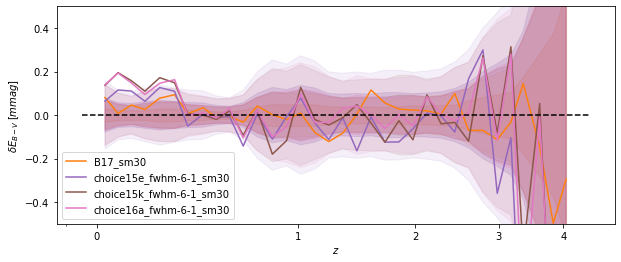

In [60]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_acc_comparison(accsref, [accs15e, accs15k, accs16a], cols=cycle, ref_choice=[1])

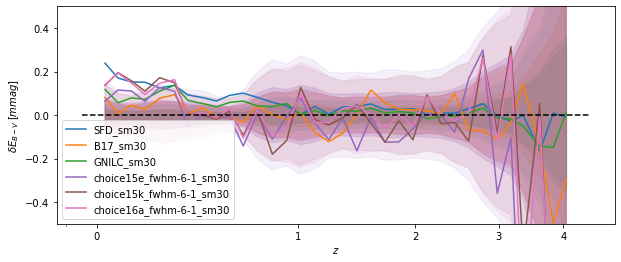

In [61]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_acc_comparison(accsref, [accs15e, accs15k, accs16a], cols=cycle, ref_choice=[0, 1, 2])

In [51]:
acc15h = pickle.load(open(nbtestdir+'runs/2_12/accdir/choice15h_fwhm-6-1_acc_intgn.pkl', 'rb'))
accs15h = acc15h['accs_all']

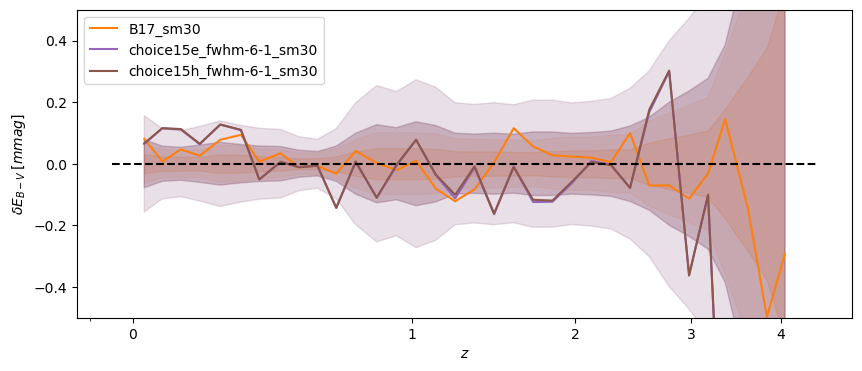

In [53]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_acc_comparison(accsref, [accs15e, accs15h], cols=cycle, ref_choice=[1])

In [57]:
acc15i = pickle.load(open(nbtestdir+'runs/2_12/accdir/choice15i_fwhm-6-1_acc_intgn.pkl', 'rb'))
accs15i = acc15i['accs_all']

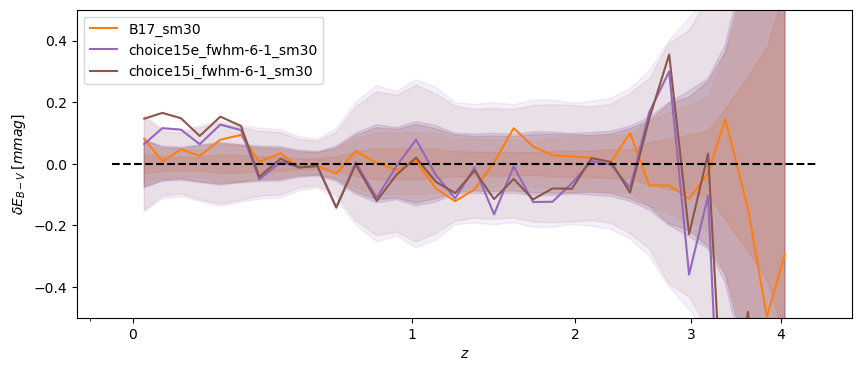

In [58]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_acc_comparison(accsref, [accs15e, accs15i], cols=cycle, ref_choice=[1])

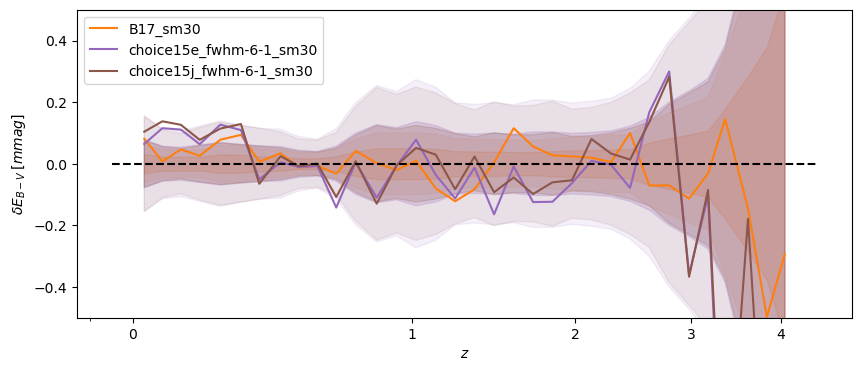

In [13]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
acc15j = pickle.load(open(nbtestdir+'runs/2_12/accdir/choice15j_fwhm-6-1_acc_intgn.pkl', 'rb'))
accs15j = acc15j['accs_all']
plot_acc_comparison(accsref, [accs15e, accs15j], cols=cycle, ref_choice=[1])

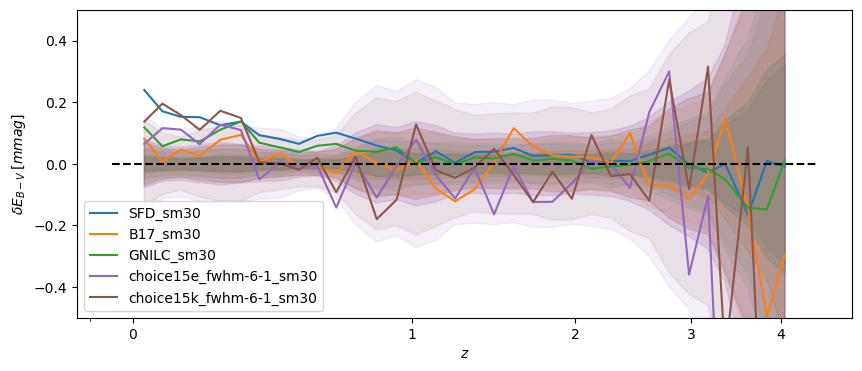

In [18]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
acc15k = pickle.load(open(nbtestdir+'runs/2_12/accdir/choice15k_fwhm-6-1_acc_intgn.pkl', 'rb'))
accs15k = acc15k['accs_all']
plot_acc_comparison(accsref, [accs15e, accs15k], cols=cycle, ref_choice=[0, 1, 2])

#### Was 15k less noisy than 15e?

In [16]:
os.listdir(nbtestdir+'runs/12_28/')

['testbeds', '.ipynb_checkpoints', 'Trash']

In [50]:
reconm10d = pickle.load(open(nbtestdir+'runs/12_28/testbeds/choice10d_fwhm-6-1_6patches.pkl', 'rb'))['dustmap']
reconm15e = pickle.load(open(nbtestdir+'runs/2_12/15e_fwhm-6-1_6patches.pkl', 'rb'))['dustmap']
reconm15k = pickle.load(open(nbtestdir+'runs/2_12/15k_fwhm-6-1.pkl', 'rb'))['dustmap']
reconm15l = pickle.load(open(nbtestdir+'runs/2_12/15l_fwhm-6-1.pkl', 'rb'))['dustmap']

In [51]:
sfdmap = get_sfd_map()
b17map = get_bayestar2017_map()

In [52]:
regngc

{'name': 'NGC',
 'coords': array([      0,       1,       2, ..., 8998909, 8998910, 8998911]),
 'Nresol': 2048,
 'rot': [0, 90],
 'xsize': 5000}

In [53]:
compmaps = [('SFD', sfdmap), ('B17', b17map), ('Choice10d', reconm10d), ('Choice15e', reconm15e), ('Choice15k', reconm15k), ('Choice15l', reconm15l)]
reg = regngc
print(reg['name'], ': SFD Mean / Std = {:.3f}, {:.3f}'.format(np.mean(sfdmap[reg['coords']]), np.std(sfdmap[reg['coords']])))
for (mname, fullmap) in compmaps:
    print('{} Offset relative to SFD: '.format(mname))
    get_sfd_error(fullmap, sfdmap, reg['coords'])
print('_______________________________')


NGC : SFD Mean / Std = 0.030, 0.021
SFD Offset relative to SFD: 
Mean = 0.000 Std = 0.000
B17 Offset relative to SFD: 
Mean = 0.004 Std = 0.010
Choice10d Offset relative to SFD: 
Mean = 0.009 Std = 0.019
Choice15e Offset relative to SFD: 
Mean = 0.011 Std = 0.023
Choice15k Offset relative to SFD: 
Mean = 0.007 Std = 0.019
Choice15l Offset relative to SFD: 
Mean = 0.008 Std = 0.018
_______________________________


In [33]:
(regngc['coords'] == get_tile_idx_in_circlepatch(2048, [0, 90], 50)).sum(), len(regngc['coords'])

(8998912, 8998912)

In [39]:
reconm10dict = pickle.load(open(nbtestdir+'runs/12_28/testbeds/choice10d_fwhm-6-1.pkl', 'rb'))
reconm10d = reconm10dict['dustmap']
reconpix = reconm10dict['reconpix']

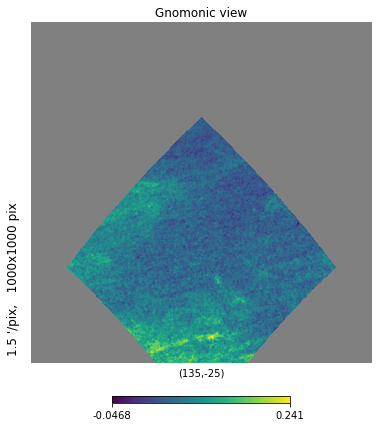

In [46]:
hp.gnomview(reconm10d, rot=[135, -25], xsize=1000)

##### Old Cells: when sdss_strict1 didn't work (because some patches have all 22.5 freadings)

In [27]:
t32all = np.unique(get_largepix_for_smallpix(coords, 2048, 32))

In [29]:
miss= []
for til in t32all:
    if not os.path.exists(runname+'_tmpdir/recon_{}.hdf5'.format(til)):
        miss.append(til)

In [31]:
len(miss)

296

In [32]:
mcoords = []
for til in miss:
    mcoords.append(get_smallpix_in_tilepix(32, til, 2048))
mcoords = np.hstack(mcoords)

In [35]:
runname

'../notebooks_test/runs/2_12/15h_fwhm-6-1_6patches'

In [36]:
methods2.looptilewise(mcoords, recon_func_name, cuts_list, kwargs_dict, runname, save_tilewise=True, compile_pickle=False)

Looping over 296 tiles
Using dir  /n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/data/lsdraw/stars_edr3/{}.fits
Region for tile1085


/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/notebooks_main1/../methods_code_Nresol/do_recon_tilewise.py:44: RuntimeWarning: divide by zero encountered in true_divide
  df['reduced_chisq'] = df['chisq'].to_numpy() * n_passbands / (n_passbands - 4)
/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/notebooks_main1/../methods_code_Nresol/do_recon_tilewise.py:49: RuntimeWarning: divide by zero encountered in power
  sdss_flux_sig = np.power(np.array(dat['sdss_dr14_starsweep.psfflux_ivar']), -0.5)
/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/notebooks_main1/../methods_code_Nresol/do_recon_tilewise.py:51: RuntimeWarning: divide by zero encountered in log10
  df['sdss.pmag_'+b] = 22.5 - 2.5*np.clip(np.log10(np.array(dat['sdss_dr14_starsweep.psfflux'])[:, ib]), 0.0, np.inf)
/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/notebooks_main1/../methods_code_Nresol/do_recon_tilewise.py:51: RuntimeWarning: invalid value encountered in log10
  df['sdss.pmag_'+b] = 22.5 - 2.5*np.clip(np.log

Cut0 48806 0.959727848350179
Cut1 50380 0.9906791992763597
Cut2 50235 0.987827899476934
Cut3 48689 0.9574271443740905
Cut4 0 0.0
Cut5 48816 0.9599244897156566
Cuts_All 0 0.0
Tile 1085, NumPixels=4096, NumStars=0, Star/Pix ratio = 0.0


IndexError: cannot do a non-empty take from an empty axes.